In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [16]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [11]:
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [12]:
# Training SOM
from minisom import MiniSom
# x and y are used for matrix dimensions, input_len for # features, and sigma refers to BMU's radius reach 
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

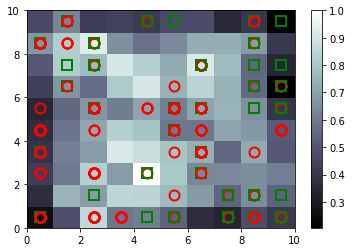

In [13]:
# Visualize SOM
from pylab import bone, pcolor, colorbar, plot, show
bone()
# Getting MID (mean intermediate distance between all the nodes and the BMU within the neighborhood defined by sigma), higher(whiter) == further away from neighbors == more it is an outlier == fraud
pcolor(som.distance_map().T)
colorbar()

# Distinguishing between customers who got approval while fradulent and those who did not (is more relevant to attack fraud that is within the company now, than those that got rejected)
# Red circle == not approved, green square == approved
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
#     Centering marker
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)

show()

In [18]:
# Getting list of fradulent clients (those in white clusters) using their coordinates
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,2)], mappings[(2,8)]), axis = 0)
frauds = np.concatenate((frauds, mappings[(6,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [19]:
print(frauds)

[[1.5585855e+07 1.0000000e+00 4.0250000e+01 ... 2.0000000e+00
  0.0000000e+00 1.2010000e+03]
 [1.5661412e+07 1.0000000e+00 4.8750000e+01 ... 2.0000000e+00
  1.8100000e+02 1.6560000e+03]
 [1.5799785e+07 1.0000000e+00 5.6420000e+01 ... 2.0000000e+00
  0.0000000e+00 1.6000000e+01]
 ...
 [1.5711759e+07 1.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.5665181e+07 1.0000000e+00 3.5250000e+01 ... 2.0000000e+00
  8.0000000e+01 1.0000000e+00]
 [1.5808223e+07 1.0000000e+00 3.1570000e+01 ... 2.0000000e+00
  0.0000000e+00 1.0000000e+00]]
